# Production Budget vs Domestic Gross 

In [1]:
import pandas as pd

import matplotlib as plt

import seaborn as sns

tn_budgets = pd.read_csv('Data/tn.movie_budgets.csv.gz')
tn_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [2]:

df = tn_budgets

df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


## convert release date column to datetime in plans to show release date vs budget increase/decrease


In [3]:
#convert release date column to datetime in plans to show release date vs budget increase/decrease

df['release_date'] =  pd.to_datetime(df['release_date'], infer_datetime_format=True)


df_dates = df[(df['release_date'].dt.year >= 2013)]
df_dates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1431 entries, 2 to 5780
Data columns (total 6 columns):
id                   1431 non-null int64
release_date         1431 non-null datetime64[ns]
movie                1431 non-null object
production_budget    1431 non-null object
domestic_gross       1431 non-null object
worldwide_gross      1431 non-null object
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 78.3+ KB


In [4]:
df_dates.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,2018-04-27,Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"


### updated data frame for datetime 

In [5]:
df = df_dates
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,2018-04-27,Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"


In [37]:
#cleaned the data in order to disable the function of dollar signs, and replace dollar signs with nothing so that the data can be imported as a numerical value in seaborn

df.production_budget = df.production_budget.replace('\$','', regex = True)


df.production_budget = df.production_budget.replace('\,','', regex = True)

df.domestic_gross = df.domestic_gross.replace('\$','', regex = True)
#cleaned the data in order to disable the function of commas, and replace, commas with nothing so that the data can be imported as a numerical value in seaborn


df.domestic_gross = df.domestic_gross.replace('\,','', regex = True)

df.worldwide_gross = df.worldwide_gross.replace('\$','', regex = True)

df.worldwide_gross = df.worldwide_gross.replace('\,','', regex = True)


df


,release_date,id,production_budget,domestic_gross,worldwide_gross
0,2,42,200000000,700059566,1348258224
1,3,18,250000000,330360194,867500281
2,4,30,550000000,904580247,3282980467
3,5,155,1485600000,2052221978,5802184365
4,6,226,1617000000,2456563557,6437285052
5,7,13,275000000,89302115,260002115
6,11,19,600000000,429098470,1535566132
7,12,99,1323000000,2602507574,6325080299


In [7]:
df.info()




<class 'pandas.core.frame.DataFrame'>
Int64Index: 1431 entries, 2 to 5780
Data columns (total 6 columns):
id                   1431 non-null int64
release_date         1431 non-null datetime64[ns]
movie                1431 non-null object
production_budget    1431 non-null object
domestic_gross       1431 non-null object
worldwide_gross      1431 non-null object
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 78.3+ KB


In [8]:
df.production_budget = df.production_budget.astype(int)
df.domestic_gross = df.domestic_gross.astype(int)
df.worldwide_gross = df.worldwide_gross.astype(int)

In [ ]:

df.loc[(df!=0).any(axis=1)]

df 


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16, 8))
plt.xlabel('Production Budget')





sns.scatterplot(x= df.production_budget, y= df.domestic_gross, hue='domestic_gross', data= df, s= 400, color = 'b')

#sns.catplot(x= df.production_budget, y= df.domestic_gross, hue=None, data= df, ci = None)
#ax = sns.barplot(x=df.production_budget, y= df.domestic_gross, data= dfdropped, ci = None, color = 'rebeccapurple')

## Month released vs domestic gross

In [11]:
#df['release_date'] = pd.to_datetime(df.release_date, format='%b', errors='coerce').dt.month
#df.sort_values(by='release_date')

//anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
41,42,2,Black Panther,200000000,700059566,1348258224
17,18,3,Batman v Superman: Dawn of Justice,250000000,330360194,867500281
6,7,4,Avengers: Infinity War,300000000,678815482,2048134200
22,23,4,The Fate of the Furious,250000000,225764765,1234846267
48,49,5,Guardians of the Galaxy Vol 2,200000000,389813101,862316233
3,4,5,Avengers: Age of Ultron,330600000,459005868,1403013963
11,12,5,Solo: A Star Wars Story,275000000,213767512,393151347
16,17,5,Captain America: Civil War,250000000,408084349,1140069413
47,48,5,Iron Man 3,200000000,408992272,1215392272
24,25,5,Pirates of the Caribbean: Dead Men Tell No Tales,230000000,172558876,788241137


In [18]:
dfreleasedate = df.groupby('release_date').sum().reset_index()

In [20]:
dfreleasedate

NameError: name 'dfreleasedate' is not defined

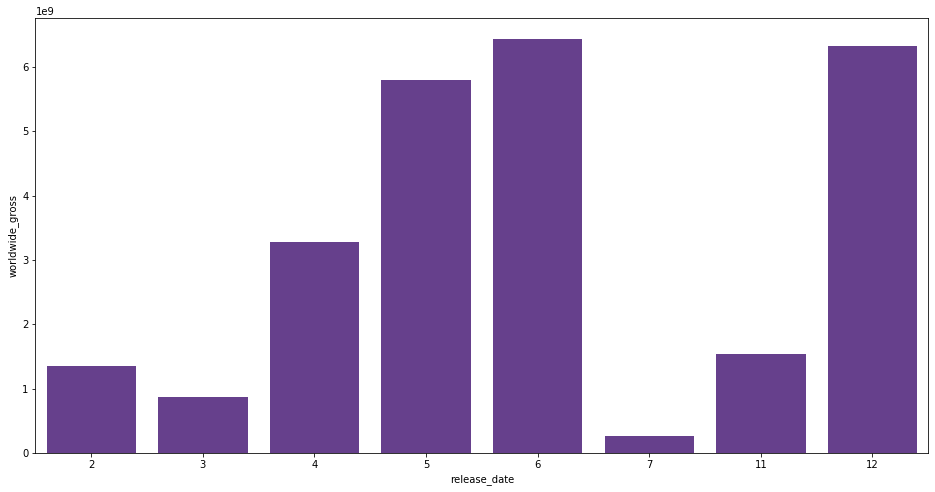

In [16]:
plt.figure(figsize=(16, 8))


ax = sns.barplot(x=df.release_date, y= df.worldwide_gross, data= df, ci = None, color = 'rebeccapurple')

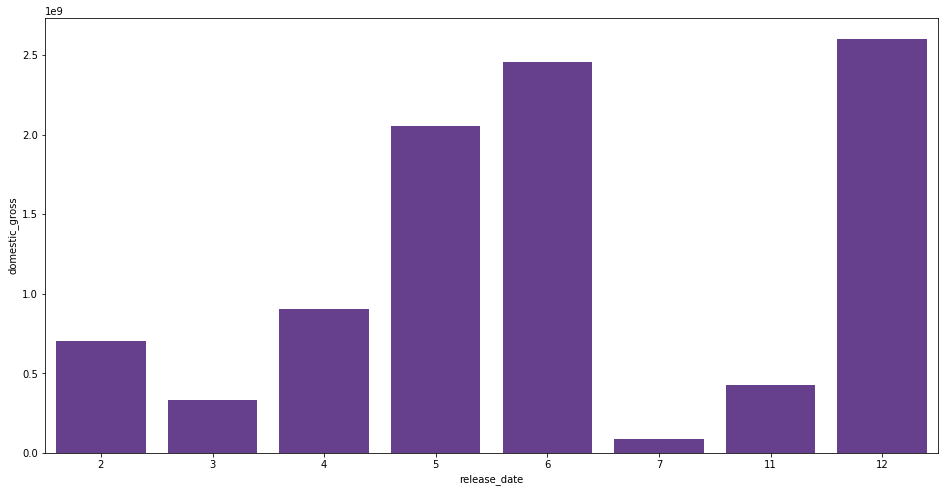

In [18]:

plt.figure(figsize=(16, 8))

ax = sns.barplot(x=df.release_date, y= df.domestic_gross, data= df, ci = None, color = 'rebeccapurple')

domestic vs worldwide gross revenue does not change according to month releaed. This would tell you to that releasing the movie in a seperate time frame according to geographical location would not be beneficial